## Final Project Submission

Please fill out:
* Student name:  Olgah Omollo
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Maryanne Mwikali
* Blog post URL:


# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

Importing python libraries required for data analysis and visualization

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dowloading of the CSV file

In [76]:
df=pd.read_csv("AviationData.csv", encoding="ISO-8859-1",low_memory=False)

# Reading the first 5 rows of data 

In [77]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Viewing information on the data to identify the colums with missing information

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Creating relevant colums for the data analysis

In [88]:
relevant_columns = [
    "Make", "Model","Number.of.Engines", "Injury.Severity",
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured"
]
df_clean =df[relevant_columns].copy()

# Cleaning of Data

Convert injury columns to numeric and fill missing with 0

In [89]:

injury_cols = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries",
    "Total.Minor.Injuries", "Total.Uninjured"
]
df_clean[injury_cols] =df_clean[injury_cols].apply(pd.to_numeric, errors='coerce').fillna(0)



Cleaning the Injury colums by filling blank rows with Unavailble

In [92]:
df_clean['Injury.Severity'] = df_clean['Injury.Severity'].fillna('Unavailable')


Cleaning the number of Engine columns by removing the empty rows

In [93]:
df_clean = df_clean.dropna(subset=['Number.of.Engines'])

Cleaning the make column by removing empty rows

In [100]:
df_clean = df_clean.dropna(subset=['Make'])

Cleaning the Model colum by removing the emty rows

In [101]:
df_clean = df_clean.dropna(subset=['Model'])

Confirming the data after Cleaning

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82754 entries, 0 to 88886
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    82754 non-null  object 
 1   Model                   82754 non-null  object 
 2   Number.of.Engines       82754 non-null  float64
 3   Injury.Severity         82754 non-null  object 
 4   Total.Fatal.Injuries    82754 non-null  float64
 5   Total.Serious.Injuries  82754 non-null  float64
 6   Total.Minor.Injuries    82754 non-null  float64
 7   Total.Uninjured         82754 non-null  float64
dtypes: float64(5), object(3)
memory usage: 5.7+ MB


# Data Analysis

In [104]:

# Calculate risk score (Fatal=10, Serious=5, Minor=2)
df_clean["RiskScore"] = (
    10 * df_clean["Total.Fatal.Injuries"] +
    5 * df_clean["Total.Serious.Injuries"] +
    2 * df_clean["Total.Minor.Injuries"]
)



Downloading of the cleaned data

In [110]:
df_clean.to_csv('cleaned_data.csv', index=False)

In [ ]:
# No of Engines vs risk-bar

In [ ]:
#scatter make vs risk score

In [106]:
# Group by Make and Model to summarize risk
risk_summary = (
    df_clean
    .groupby(["Make", "Model"])
    .agg(
        Total_Incidents=("RiskScore", "count"),
        Total_RiskScore=("RiskScore", "sum"),
        Avg_RiskScore=("RiskScore", "mean")
    )
    .reset_index()
    .sort_values(by="Avg_RiskScore")
)


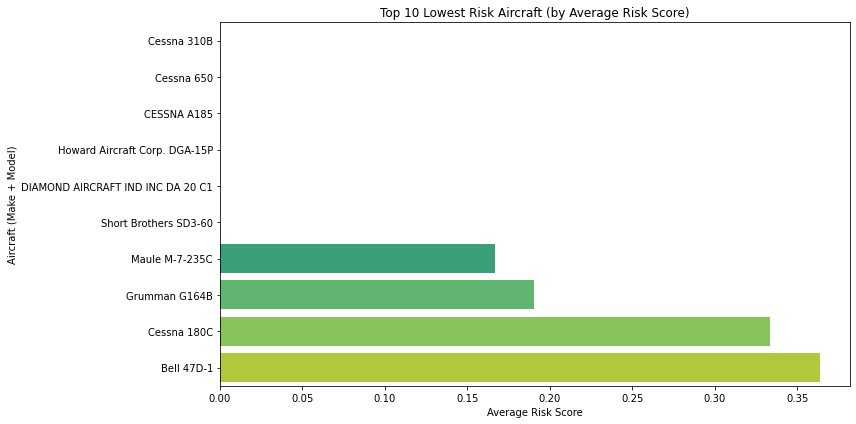

In [107]:
# Filter aircraft with 10+ incidents
lowest_risk_aircraft = risk_summary[risk_summary["Total_Incidents"] >= 10].head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Avg_RiskScore",
    y=lowest_risk_aircraft["Make"] + " " + lowest_risk_aircraft["Model"],
    data=lowest_risk_aircraft,
    palette="viridis"
)
plt.title("Top 10 Lowest Risk Aircraft (by Average Risk Score)")
plt.xlabel("Average Risk Score")
plt.ylabel("Aircraft (Make + Model)")
plt.tight_layout()
plt.show()

